# Resize Image 1569 * 1570 ====> 785*785

In [2]:
import os
import cv2
import shutil

In [9]:
file_path = '/home/john/network/Fundus/project/dataset/Used/vessel/image_o/'
outputfile = '/home/john/network/Fundus/project/dataset/Used/vessel/Low/'

In [12]:
dir_list = os.listdir(file_path)

for i in dir_list:
    image  = cv2.imread(file_path + i)
    image_R = cv2.resize(image,(785,785))
    output_path = os.path.join(outputfile, "Low_{}".format(i))
    cv2.imwrite(output_path,image_R)

# Select ROI

In [1]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [29]:
def crop_image_from_gray(img,tol=7):

    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        mask = gray_img>tol        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]

        if (check_shape == 0):
            return img
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img


def circle_crop_single(img):   

    img = cv2.imread(img)
    img = crop_image_from_gray(img)    
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)

    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    
    return img 


def circle_crop(File):   
    
    InputFile  =  '/home/john/network/Fundus/project/samples/FundusData_20230915/' + File
    img = cv2.imread(InputFile)
    img = crop_image_from_gray(img)    
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)

    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    
    return img 

# Single Test

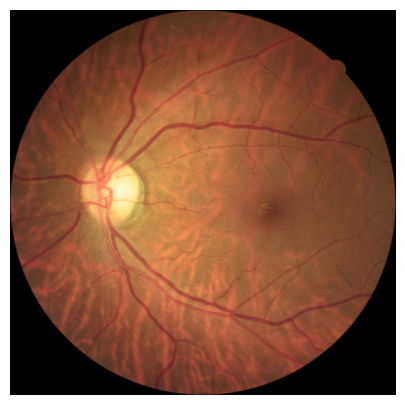

True

In [13]:
TestFileRoute = '/home/john/network/Fundus/project/samples/FundusData_20230915/7093981-05-L-20200804.jpg'

fig, ax = plt.subplots(figsize=(5,5))

ImageCut = circle_crop_single(TestFileRoute)
ax.imshow(cv2.cvtColor(ImageCut, cv2.COLOR_BGR2RGB))
ax.axis('off')

plt.show()
cv2.imwrite('7093981-05-L-20200804.jpg_Test.jpg', ImageCut)

# Auto Select All Images ROI

In [37]:
File_route = '/home/john/network/Fundus/project/samples/FundusData_20230915/'
ROI_File = '/home/john/network/Fundus/project/dataset/Select_ROI/'

In [39]:
dir_list = os.listdir(File_route)

for i in dir_list:
    ImageCut = circle_crop(i)
    output_path = os.path.join(ROI_File, "ROI_{}".format(i))
    cv2.imwrite(output_path, ImageCut)

print("Done")

Done
